# Exploration of Dandiset 001174: Calcium imaging in SMA and M1 of macaques

> **⚠️ IMPORTANT NOTE**: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results. The notebook is intended as a starting point for exploring the dataset, not for drawing scientific conclusions.

This notebook provides tools for exploring and analyzing Dandiset 001174, which contains calcium imaging data from the supplementary motor area (SMA) and primary motor cortex (M1) of macaque monkeys. The notebook demonstrates how to:

1. Access Dandiset metadata and asset information
2. Load calcium imaging data from NWB files
3. Visualize and analyze neuronal activity patterns

## Required Packages

This notebook requires the following packages:

- `pynwb`: For working with Neurodata Without Borders (NWB) files
- `h5py`: For working with HDF5 files
- `remfile`: For remotely accessing files
- `numpy`: For numerical operations
- `matplotlib`: For plotting
- `pandas`: For data manipulation
- `seaborn`: For enhanced visualizations

We assume these packages are already installed in your environment.

## 1. Introduction to Dandiset 001174

Let's start by exploring the metadata of this Dandiset to understand what kind of data it contains.

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.cm as cm

# Set the seaborn theme for better visualizations
sns.set_theme()

### 1.1 Dandiset Metadata

First, we'll look at the basic metadata of the Dandiset to understand the context and purpose of the data.

In [2]:
# Metadata of the Dandiset
dandiset_id = "001174"
dandiset_name = "Calcium imaging in SMA and M1 of macaques"
dandiset_description = """
The study of motor cortices in non-human primates is relevant to our understanding of human motor control, 
both in healthy conditions and in movement disorders. Calcium imaging and miniature microscopes allow the 
study of multiple genetically identified neurons with excellent spatial resolution. We used this method to 
examine activity patterns of projection neurons in deep layers of the supplementary motor (SMA) and primary 
motor areas (M1) in four rhesus macaques. We implanted gradient index lenses and expressed GCaMP6f to image 
calcium transients while the animals were at rest or engaged in an arm reaching task. We tracked the activity 
of SMA and M1 neurons across conditions, examined cell pairs for synchronous activity, and assessed whether 
SMA and M1 neuronal activation followed specific sequential activation patterns. We demonstrate the value of 
in vivo calcium imaging for studying patterns of activity in groups of corticofugal neurons in SMA and M1.
"""

# Display metadata
print(f"Dandiset ID: {dandiset_id}")
print(f"Name: {dandiset_name}")
print("\nDescription:")
print(dandiset_description)

Dandiset ID: 001174
Name: Calcium imaging in SMA and M1 of macaques

Description:

The study of motor cortices in non-human primates is relevant to our understanding of human motor control, 
both in healthy conditions and in movement disorders. Calcium imaging and miniature microscopes allow the 
study of multiple genetically identified neurons with excellent spatial resolution. We used this method to 
examine activity patterns of projection neurons in deep layers of the supplementary motor (SMA) and primary 
motor areas (M1) in four rhesus macaques. We implanted gradient index lenses and expressed GCaMP6f to image 
calcium transients while the animals were at rest or engaged in an arm reaching task. We tracked the activity 
of SMA and M1 neurons across conditions, examined cell pairs for synchronous activity, and assessed whether 
SMA and M1 neuronal activation followed specific sequential activation patterns. We demonstrate the value of 
in vivo calcium imaging for studying patterns 

### 1.2 Key Information About the Dandiset

This Dandiset contains calcium imaging data from the supplementary motor area (SMA) and primary motor cortex (M1) of rhesus macaques. The researchers used miniature microscopes with GCaMP6f to image calcium transients in neurons while the monkeys were at rest or performing an arm reaching task.

Key aspects of this dataset:

- **Subjects**: Rhesus macaques (Macaca mulatta)
- **Brain Areas**: SMA (supplementary motor area) and M1 (primary motor cortex)
- **Technique**: One-photon calcium imaging using miniature microscopes
- **Task**: Arm reaching task
- **Measurement**: Calcium transients in neurons

### 1.3 Accessing the Dandiset through the DANDI API

Now we'll use the DANDI API to access the Dandiset and list its assets.

In [3]:
from dandi.dandiapi import DandiAPIClient

# Initialize the DANDI API client
client = DandiAPIClient()

# Get the Dandiset
dandiset = client.get_dandiset(dandiset_id)
print(f"Dandiset: {dandiset.identifier} - {dandiset.version}")

# Get the assets
assets = list(dandiset.get_assets())
print(f"Total number of assets: {len(assets)}")

# Display the first 10 assets
print("\nFirst 10 assets:")
asset_data = []
for i, asset in enumerate(assets[:10]):
    asset_dict = {
        'Index': i,
        'Path': asset.path,
        'Size (MB)': round(asset.size / (1024 * 1024), 2)
    }
    asset_data.append(asset_dict)

asset_df = pd.DataFrame(asset_data)
asset_df

Dandiset: 001174 - 0.250331.2218
Total number of assets: 45

First 10 assets:


,Index,Path,Size (MB)
0,0,sub-V/sub-V_ses-20230309T110929_ophys.nwb,10165.89
1,1,sub-Q/sub-Q_ophys.nwb,753.54
2,2,sub-Q/sub-Q_ses-20220922T131747_ophys.nwb,751.35
3,3,sub-Q/sub-Q_ses-20221003T131952_ophys.nwb,1617.36
4,4,sub-Q/sub-Q_ses-20221028T121142_ophys.nwb,1485.07
5,5,sub-Q/sub-Q_ses-20221201T132256_ophys.nwb,1580.23
6,6,sub-Q/sub-Q_ses-20221202T122907_ophys.nwb,1496.17
7,7,sub-Q/sub-Q_ses-20221206T121002_ophys.nwb,23953.49
8,8,sub-Q/sub-Q_ses-20220915T133954_ophys.nwb,1123.68
9,9,sub-Q/sub-Q_ses-20221201T134628_ophys.nwb,796.74


### 1.4 Analysis of Available Assets

Let's analyze the structure of the assets to understand what data is available.

In [4]:
# Extract information about subjects and session types
all_assets = []
for asset in assets:
    parts = asset.path.split('/')
    if len(parts) >= 2:
        subject = parts[0]
        filename = parts[-1]
        
        # Extract session information if available
        session = "N/A"
        if "_ses-" in filename:
            session_part = filename.split("_ses-")[1].split("_")[0]
            session = session_part
            
        all_assets.append({
            'Subject': subject,
            'Session': session,
            'Path': asset.path,
            'Size (MB)': round(asset.size / (1024 * 1024), 2)
        })

assets_df = pd.DataFrame(all_assets)

# Display summary by subject
subject_summary = assets_df.groupby('Subject').agg({
    'Path': 'count', 
    'Size (MB)': 'sum'
}).rename(columns={'Path': 'Number of Files'})

print("Summary by Subject:")
subject_summary

Summary by Subject:


,Number of Files,Size (MB)
Subject,,
sub-F,9,178818.35
sub-Q,14,39335.94
sub-U,18,370489.95
sub-V,4,67124.59


## 2. Loading and Exploring NWB Data

Now we'll load one of the NWB files to explore its structure and content. We'll focus on a file from subject Q.

In [5]:
# Define the URL for the selected NWB file
nwb_url = "https://api.dandiarchive.org/api/assets/807851a7-ad52-4505-84ee-3b155a5bd2a3/download/"

# Open the file using remfile and h5py
file = remfile.File(nwb_url)
f = h5py.File(file)
io = pynwb.NWBHDF5IO(file=f)
nwb = io.read()

# Display basic information about the NWB file
print(f"Session Description: {nwb.session_description}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject Species: {nwb.subject.species}")
print(f"Subject Sex: {nwb.subject.sex}")
print(f"Subject Age: {nwb.subject.age}")

Session Description: Calcium imaging in SMA during the arm reaching condition
Session Start Time: 2022-09-15 13:39:54.612000+00:00
Subject ID: Q
Subject Species: Macaca mulatta
Subject Sex: F
Subject Age: P5Y


### 2.1 Exploring the Structure of the NWB File

Let's examine the structure of the NWB file to understand what data is available.

In [6]:
# Exploring the available acquisition data
print("Acquisition Data:")
for name, data_interface in nwb.acquisition.items():
    print(f"- {name}: {type(data_interface).__name__}")
    
# Exploring the available processing modules
print("\nProcessing Modules:")
for name, module in nwb.processing.items():
    print(f"- {name}: {type(module).__name__}")
    print("  Data Interfaces:")
    for interface_name, interface in module.data_interfaces.items():
        print(f"    - {interface_name}: {type(interface).__name__}")

Acquisition Data:
- OnePhotonSeries: OnePhotonSeries

Processing Modules:
- ophys: ProcessingModule
  Data Interfaces:
    - EventAmplitude: RoiResponseSeries
    - Fluorescence: Fluorescence
    - ImageSegmentation: ImageSegmentation


### 2.2 Examining the One-Photon Imaging Data

This dataset contains one-photon calcium imaging data. Let's look at the properties of the imaging data.

In [7]:
# Get information about the one-photon series
one_photon_series = nwb.acquisition["OnePhotonSeries"]
print(f"Data Shape: {one_photon_series.data.shape}")
print(f"Data Type: {one_photon_series.data.dtype}")
print(f"Frame Rate: {one_photon_series.rate} Hz")
print(f"Unit: {one_photon_series.unit}")
print(f"Description: {one_photon_series.description}")

# Get information about the imaging plane
imaging_plane = one_photon_series.imaging_plane
print("\nImaging Plane Information:")
print(f"Description: {imaging_plane.description}")
print(f"Excitation Lambda: {imaging_plane.excitation_lambda} nm")
print(f"Imaging Rate: {imaging_plane.imaging_rate} Hz")

# Get information about the device used
device = imaging_plane.device
print("\nDevice Information:")
print(f"Description: {device.description}")
print(f"Manufacturer: {device.manufacturer}")

Data Shape: (9041, 320, 200)
Data Type: uint16
Frame Rate: 10.0 Hz
Unit: fluorescence
Description: Miniscope imaging data

Imaging Plane Information:
Description: The plane being imaged by the miniscope
Excitation Lambda: 475.0 nm
Imaging Rate: 10.0 Hz

Device Information:
Description: NVista3
Manufacturer: Inscopix, Inc.


### 2.3 Examining Processed Optical Physiology Data

Now, let's look at the processed ophys data, including fluorescence data and segmented cell information.

In [8]:
# Access the ophys processing module
ophys = nwb.processing["ophys"]

# Examine the fluorescence data
fluorescence = ophys.data_interfaces["Fluorescence"]
roi_response_series = fluorescence.roi_response_series["RoiResponseSeries"]

print("Fluorescence Data:")
print(f"Data Shape: {roi_response_series.data.shape}")
print(f"Data Type: {roi_response_series.data.dtype}")
print(f"Rate: {roi_response_series.rate} Hz")
print(f"Description: {roi_response_series.description}")

# Examine the cell segmentation information
image_segmentation = ophys.data_interfaces["ImageSegmentation"]
plane_segmentation = image_segmentation.plane_segmentations["PlaneSegmentation"]

print("\nImage Segmentation:")
print(f"Number of ROIs: {len(plane_segmentation.id.data[:])}")
print(f"Column Names: {plane_segmentation.colnames}")

# Examine event amplitude data
event_amplitude = ophys.data_interfaces["EventAmplitude"]
print("\nEvent Amplitude Data:")
print(f"Data Shape: {event_amplitude.data.shape}")
print(f"Data Type: {event_amplitude.data.dtype}")
print(f"Rate: {event_amplitude.rate} Hz")
print(f"Description: {event_amplitude.description}")

Fluorescence Data:
Data Shape: (9041, 40)
Data Type: float32
Rate: 10.0 Hz
Description: Fluorescence data associated with spatial footprints

Image Segmentation:
Number of ROIs: 40
Column Names: ('image_mask',)

Event Amplitude Data:
Data Shape: (9041, 40)
Data Type: float64
Rate: 10.003730030174271 Hz
Description: Amplitude of neural events associated with spatial footprints


## 3. Analyzing and Visualizing the Data

Now that we understand the structure of the data, let's create some visualizations to analyze the calcium imaging data. We'll focus on:

1. Visualizing raw imaging frames
2. Visualizing segmented ROIs (regions of interest)
3. Analyzing fluorescence traces over time
4. Examining correlations between neurons

### 3.1 Visualizing Raw Imaging Frames

Let's first look at some raw imaging frames to understand what the calcium imaging data looks like.

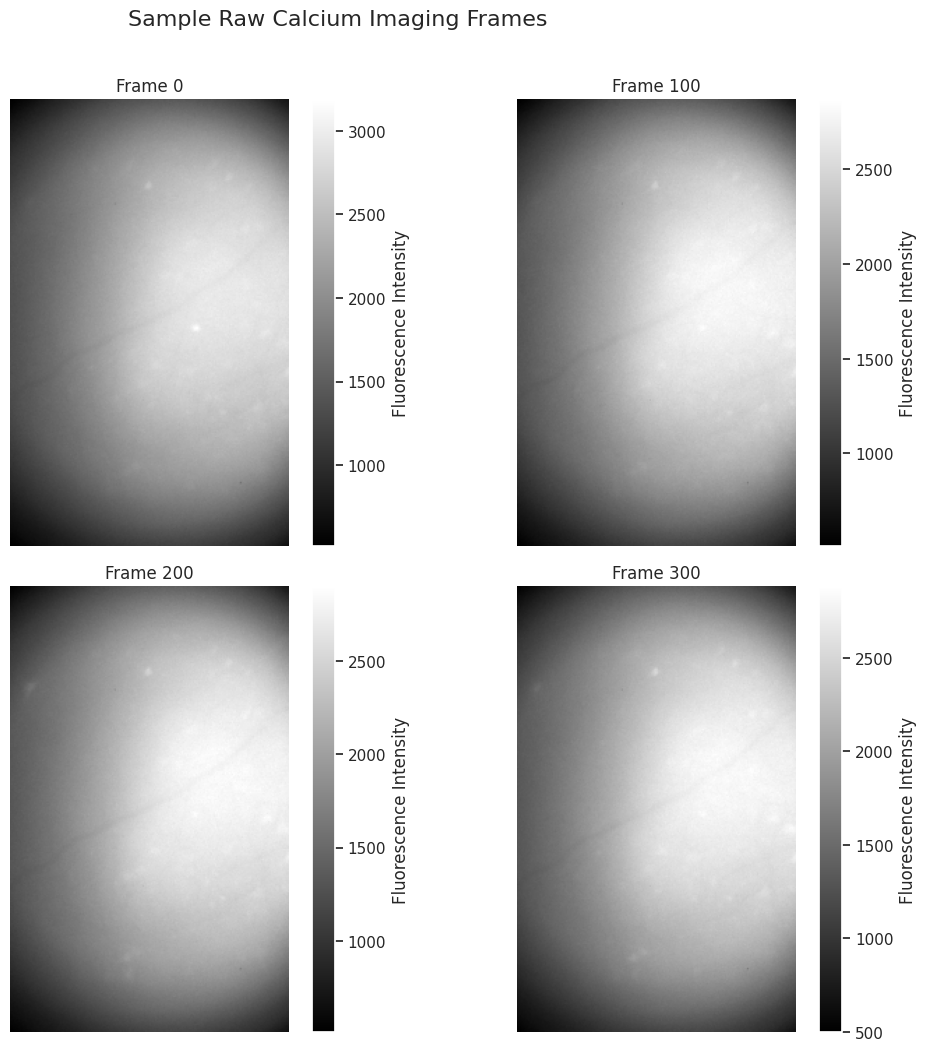

In [9]:
# Get the one-photon series data
one_photon_series = nwb.acquisition["OnePhotonSeries"]

# Extract a few frames for visualization
# Only load a subset to avoid memory issues with remote file access
frame_indices = [0, 100, 200, 300]
frames = [one_photon_series.data[i, :, :] for i in frame_indices]

# Create a figure to display the frames
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (ax, frame, idx) in enumerate(zip(axes, frames, frame_indices)):
    im = ax.imshow(frame, cmap='gray')
    ax.set_title(f"Frame {idx}")
    ax.set_axis_off()
    
    # Add a colorbar to each subplot
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Fluorescence Intensity')

plt.tight_layout()
plt.suptitle("Sample Raw Calcium Imaging Frames", fontsize=16, y=1.05)
plt.show()

### 3.2 Visualizing ROIs (Regions of Interest)

Now, let's visualize the cell ROIs (regions of interest) that were identified through segmentation.

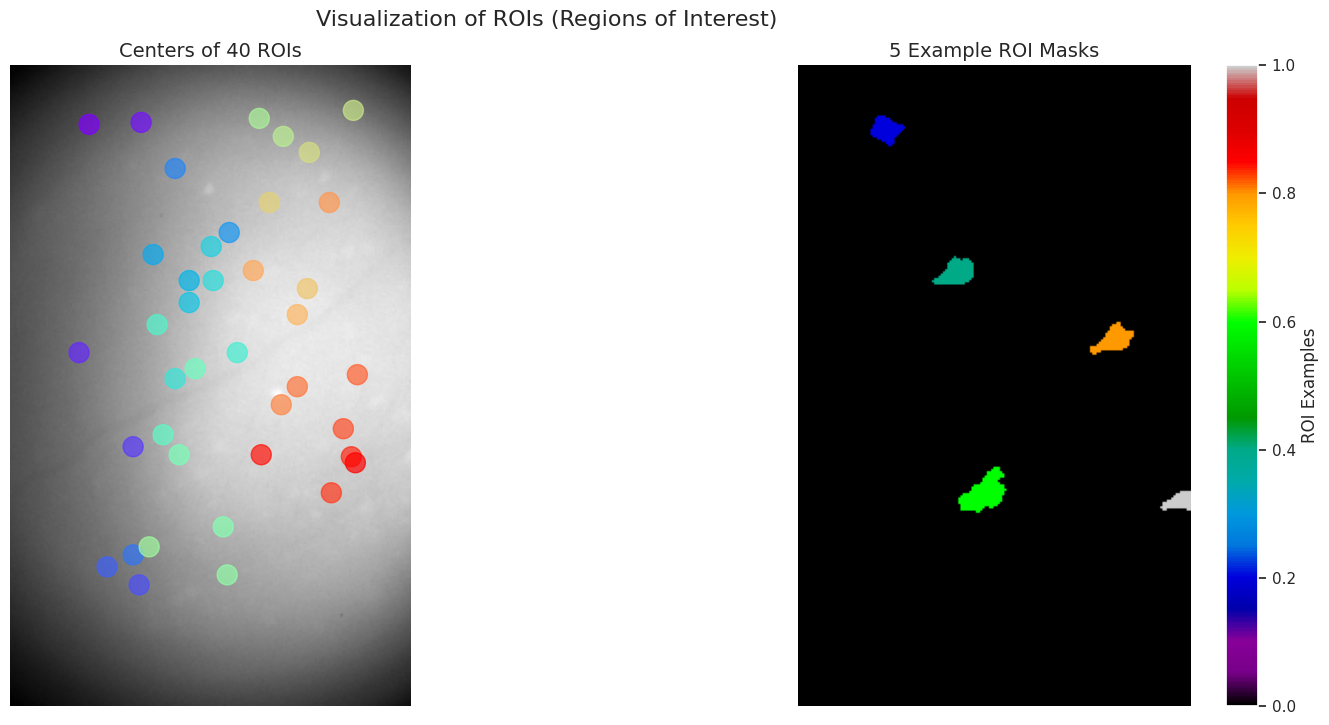

In [10]:
# Access the plane segmentation data
image_segmentation = ophys.data_interfaces["ImageSegmentation"]
plane_segmentation = image_segmentation.plane_segmentations["PlaneSegmentation"]

# Get the number of ROIs
num_rois = len(plane_segmentation.id.data[:])

# Get sample ROI mask to determine shape
sample_roi_mask = plane_segmentation['image_mask'][0]
mask_shape = sample_roi_mask.shape

# Create a figure to display the ROI information
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Representative image of ROI locations
# We'll create a visualization showing ROI centers instead of full masks
# This avoids shape mismatch issues

# Get a representative frame as background (resized if needed)
background_frame = one_photon_series.data[0, :, :]
axes[0].imshow(background_frame, cmap='gray')

# Create a blank image for ROI centers
roi_centers_image = np.zeros_like(background_frame)

# Plot ROI centers with different colors
colors = cm.rainbow(np.linspace(0, 1, num_rois))
for i in range(num_rois):
    # Get the mask for this ROI
    roi_mask = plane_segmentation['image_mask'][i]
    
    # Find the center of mass of the ROI
    # We'll use a simple approach to find approximate center
    if np.sum(roi_mask) > 0:  # Check if mask is not empty
        y_indices, x_indices = np.where(roi_mask > 0)
        center_y = int(np.mean(y_indices))
        center_x = int(np.mean(x_indices))
        
        # Plot a colored circle at the ROI center
        circle = plt.Circle((center_x, center_y), radius=5, color=colors[i], alpha=0.7)
        axes[0].add_patch(circle)

axes[0].set_title(f"Centers of {num_rois} ROIs", fontsize=14)
axes[0].set_axis_off()

# Plot 2: Visualize a few example ROI masks
# We'll show a few example ROIs to illustrate their shapes
axes[1].set_title("Example ROI Masks", fontsize=14)
axes[1].set_axis_off()

# Create a blank image for the ROI masks
mask_viz = np.zeros(mask_shape)

# Show a few example ROIs (up to 5)
num_examples = min(5, num_rois)
example_indices = np.linspace(0, num_rois-1, num_examples, dtype=int)

for i, idx in enumerate(example_indices):
    roi_mask = plane_segmentation['image_mask'][idx]
    
    # Add this mask to the visualization with a distinct color
    # and with an offset so we can see multiple masks
    offset = 0.2 * i  # Offset each mask slightly for visibility
    mask_viz += (roi_mask > 0) * (i + 1) * 0.2  # Scale for visibility

# Display the example masks
im = axes[1].imshow(mask_viz, cmap='nipy_spectral')
axes[1].set_title(f"{num_examples} Example ROI Masks", fontsize=14)
axes[1].set_axis_off()

# Add a colorbar
cbar = plt.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)
cbar.set_label('ROI Examples')

plt.tight_layout()
plt.suptitle("Visualization of ROIs (Regions of Interest)", fontsize=16, y=1.02)
plt.show()

### 3.3 Analyzing Fluorescence Traces

Let's examine the fluorescence traces for some individual cells over time.

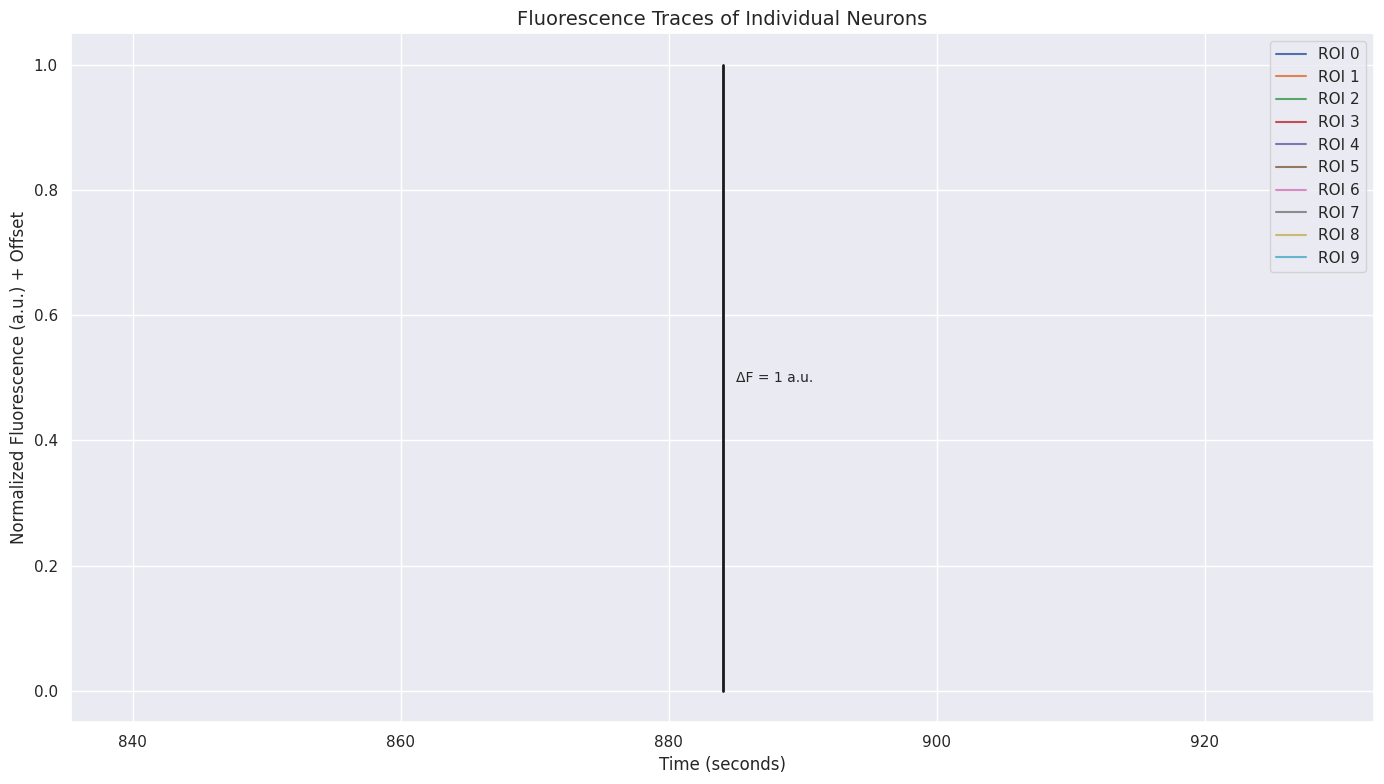

In [11]:
# Access the fluorescence data
fluorescence = ophys.data_interfaces["Fluorescence"]
roi_response_series = fluorescence.roi_response_series["RoiResponseSeries"]

# Select a subset of neurons to visualize (e.g., first 10)
num_neurons_to_plot = 10
selected_neurons = range(min(num_neurons_to_plot, roi_response_series.data.shape[1]))

# Create a time vector based on the acquisition rate
num_timepoints = roi_response_series.data.shape[0]
time = np.arange(num_timepoints) / roi_response_series.rate

# Create a plot for the fluorescence traces
plt.figure(figsize=(14, 8))

for i in selected_neurons:
    # Get the fluorescence trace for this neuron
    # We access a subset of the data to avoid loading too much at once
    trace = roi_response_series.data[:, i]
    
    # Normalize the trace for better visualization
    normalized_trace = (trace - np.min(trace)) / (np.max(trace) - np.min(trace)) + i
    
    # Plot the trace
    plt.plot(time, normalized_trace, label=f"ROI {i}")

plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Normalized Fluorescence (a.u.) + Offset", fontsize=12)
plt.title("Fluorescence Traces of Individual Neurons", fontsize=14)
plt.legend(loc='upper right')
plt.grid(True)

# Add a scale bar to indicate fluorescence scale
plt.plot([time[-1]-20, time[-1]-20], [0, 1], 'k-', linewidth=2)
plt.text(time[-1]-19, 0.5, "ΔF = 1 a.u.", fontsize=10, va='center')

plt.tight_layout()
plt.show()

### 3.4 Analyzing Event Amplitude Data

Now, let's examine the event amplitude data, which represents detected calcium events.

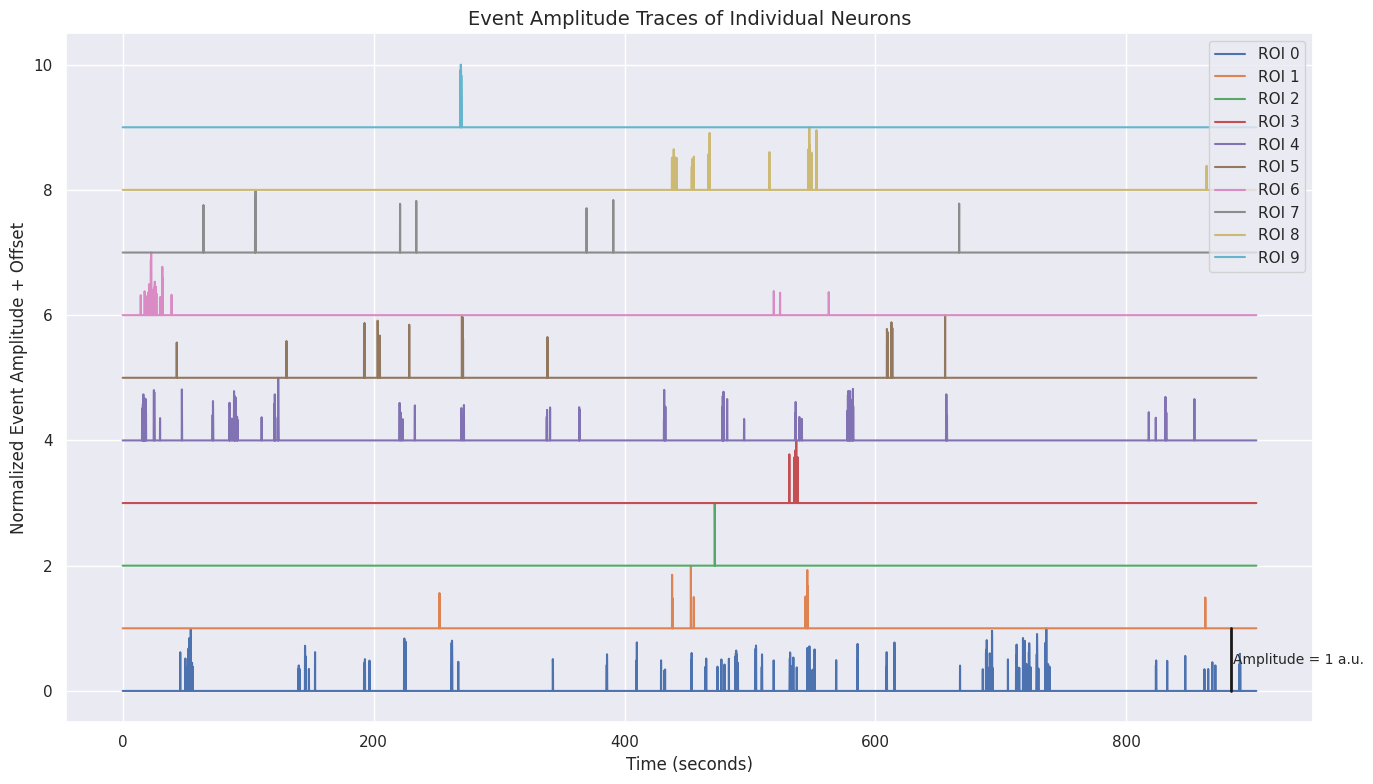

In [12]:
# Access the event amplitude data
event_amplitude = ophys.data_interfaces["EventAmplitude"]

# Select the same subset of neurons as before
selected_neurons = range(min(num_neurons_to_plot, event_amplitude.data.shape[1]))

# Create a time vector based on the acquisition rate
num_timepoints = event_amplitude.data.shape[0]
time = np.arange(num_timepoints) / event_amplitude.rate

# Create a plot for the event amplitude traces
plt.figure(figsize=(14, 8))

for i in selected_neurons:
    # Get the event amplitude trace for this neuron
    trace = event_amplitude.data[:, i]
    
    # Normalize the trace for better visualization
    normalized_trace = (trace / np.max(trace) if np.max(trace) > 0 else trace) + i
    
    # Plot the trace
    plt.plot(time, normalized_trace, label=f"ROI {i}")

plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Normalized Event Amplitude + Offset", fontsize=12)
plt.title("Event Amplitude Traces of Individual Neurons", fontsize=14)
plt.legend(loc='upper right')
plt.grid(True)

# Add a scale bar
plt.plot([time[-1]-20, time[-1]-20], [0, 1], 'k-', linewidth=2)
plt.text(time[-1]-19, 0.5, "Amplitude = 1 a.u.", fontsize=10, va='center')

plt.tight_layout()
plt.show()

### 3.5 Correlation Analysis Between Neurons

Let's analyze the correlations between different neurons to understand their functional relationships.

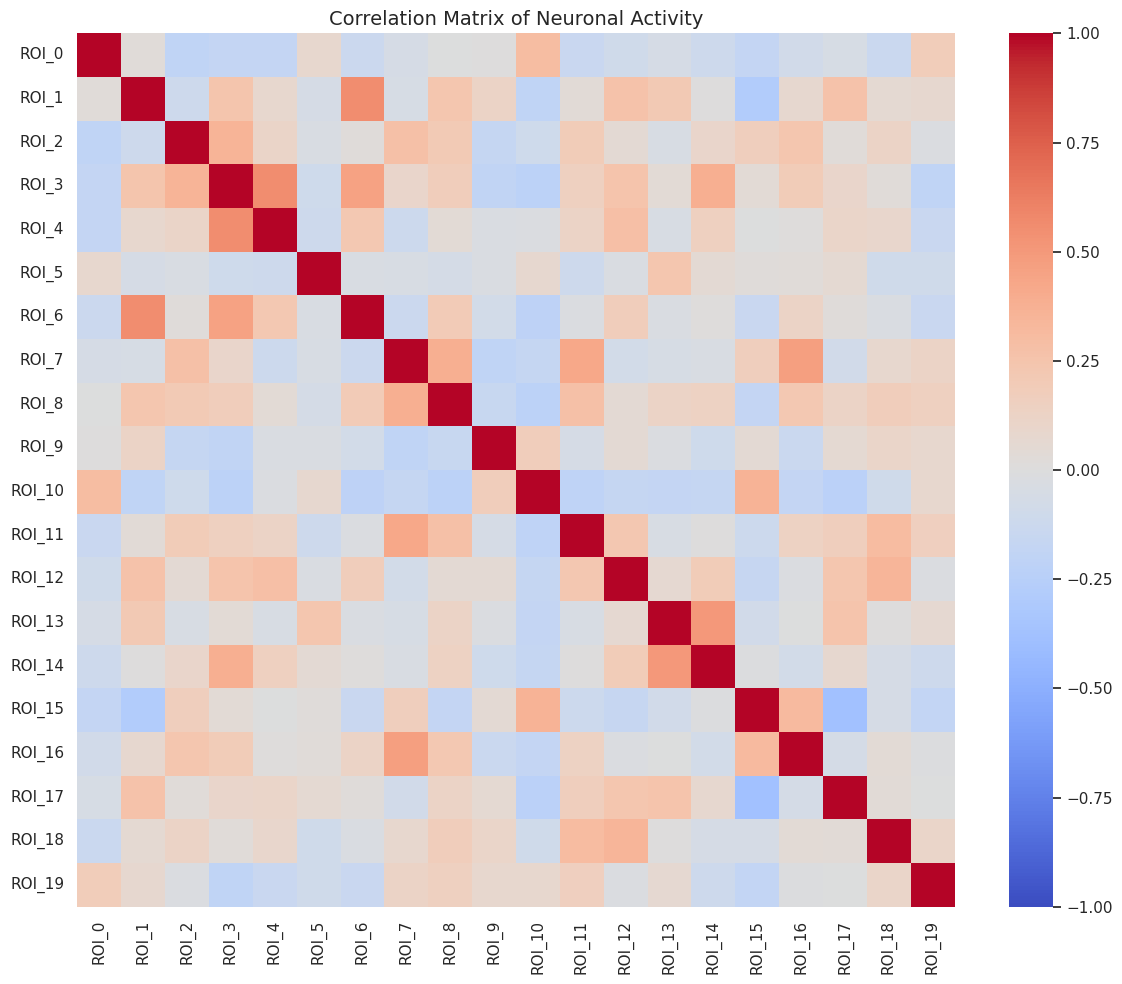

In [13]:
# Access the fluorescence data
fluorescence = ophys.data_interfaces["Fluorescence"]
roi_response_series = fluorescence.roi_response_series["RoiResponseSeries"]

# Select a subset of neurons for correlation analysis (e.g., first 20)
num_neurons_for_corr = 20
roi_indices = range(min(num_neurons_for_corr, roi_response_series.data.shape[1]))

# Extract fluorescence data for these neurons
# We'll use a subset of time points to avoid memory issues
time_subset = slice(0, min(2000, roi_response_series.data.shape[0]))
fluorescence_data = roi_response_series.data[time_subset, roi_indices]

# Convert to a pandas DataFrame for easier correlation analysis
neurons_df = pd.DataFrame(fluorescence_data, columns=[f"ROI_{i}" for i in roi_indices])

# Calculate the correlation matrix
correlation_matrix = neurons_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, 
           xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Correlation Matrix of Neuronal Activity', fontsize=14)
plt.tight_layout()
plt.show()

### 3.6 Temporal Activity Analysis

Let's analyze how the overall activity of neurons changes over time.

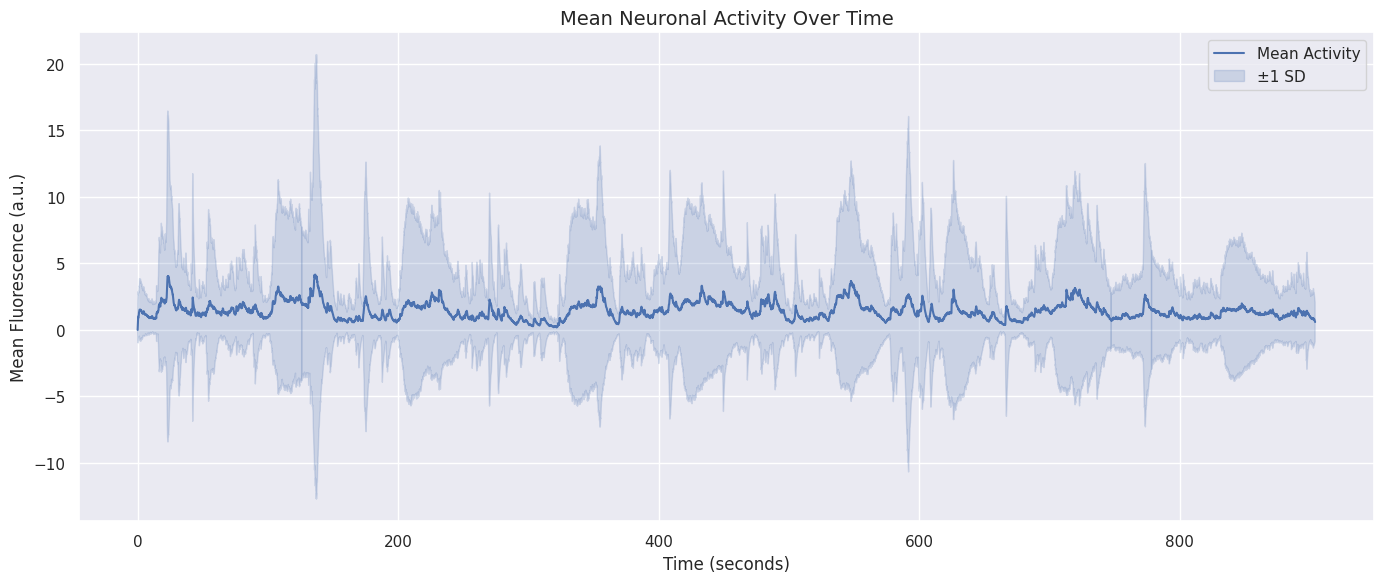

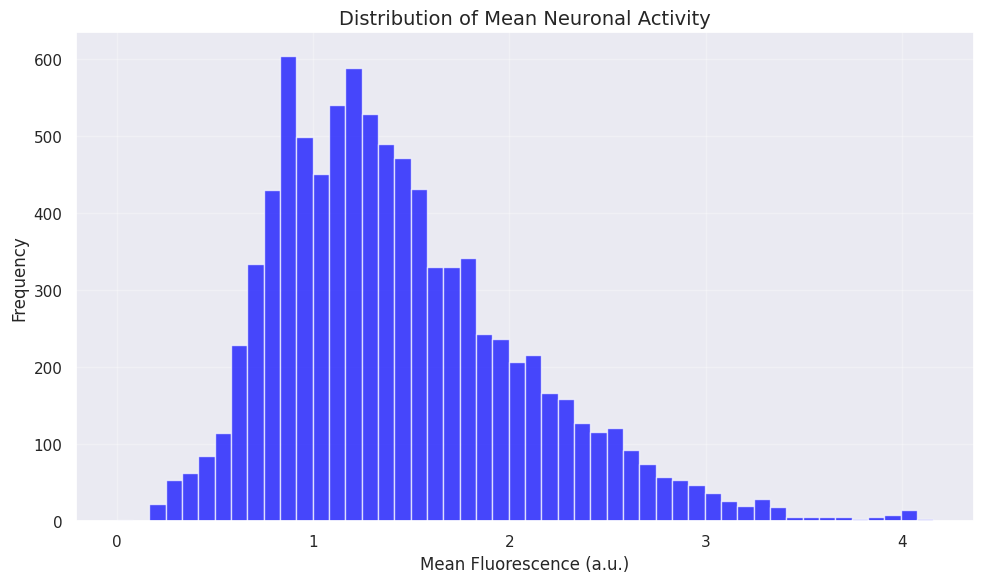

In [14]:
# Calculate mean activity across all neurons over time
mean_activity = np.mean(roi_response_series.data[:, :], axis=1)

# Calculate standard deviation of activity
std_activity = np.std(roi_response_series.data[:, :], axis=1)

# Create a time vector
time = np.arange(len(mean_activity)) / roi_response_series.rate

# Plot the mean activity with confidence intervals
plt.figure(figsize=(14, 6))
plt.plot(time, mean_activity, 'b-', label='Mean Activity')
plt.fill_between(time, mean_activity - std_activity, mean_activity + std_activity, 
                 color='b', alpha=0.2, label='±1 SD')

plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Mean Fluorescence (a.u.)', fontsize=12)
plt.title('Mean Neuronal Activity Over Time', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Let's also look at the frequency distribution of activity levels
plt.figure(figsize=(10, 6))
plt.hist(mean_activity, bins=50, alpha=0.7, color='blue')
plt.xlabel('Mean Fluorescence (a.u.)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Mean Neuronal Activity', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Summary and Conclusions

In this notebook, we've explored Dandiset 001174, "Calcium imaging in SMA and M1 of macaques". Here's a summary of what we've learned:

1. **Dataset Overview**: 
   - The dataset contains calcium imaging data from SMA and M1 regions in macaque monkeys
   - It includes data from multiple subjects and recording sessions
   - The data was collected using one-photon calcium imaging with miniature microscopes

2. **Data Structure**:
   - The data is stored in NWB (Neurodata Without Borders) format
   - Each file contains raw imaging data, processed fluorescence signals, and identified cell ROIs
   - The dataset includes both raw one-photon series data and processed fluorescence and event data

3. **Analysis Highlights**:
   - We visualized raw imaging frames to see the actual calcium imaging data
   - We examined the spatial distribution of identified neurons (ROIs)
   - We analyzed fluorescence traces and event amplitudes of individual neurons over time
   - We investigated correlations between different neurons
   - We examined the temporal dynamics of overall neuronal activity

This notebook provides a starting point for further analysis of this dataset. Researchers can use these techniques to:
- Compare neuronal activity between different behavioral conditions (rest vs. arm reaching)
- Analyze synchronous activity patterns between neurons
- Investigate sequential activation patterns in SMA and M1
- Compare activity patterns between different subjects or brain regions

Remember that this is just an initial exploration of the data. Further analysis would be needed to draw scientific conclusions about the neural mechanisms underlying motor control in these brain regions.

## Additional Resources

- [DANDI Archive](https://dandiarchive.org/): The platform hosting this dataset
- [NWB Format Documentation](https://nwb-overview.readthedocs.io/): Documentation for the Neurodata Without Borders format
- [PyNWB Documentation](https://pynwb.readthedocs.io/): Python library for working with NWB files